#**RNA E DEEP LEARNING*

#**Atividade Aula 1**

#**Professor**

*  Vitor Casadei (vc@cesar.school)

#**Integrante**

*   Arthur de Oliveira Avila (aoa2@cesar.school)



# Contexto do Exercício Aula 1


Você deve criar um Jupyter Notebook usando o Colab ou sua ferramenta local de preferência, onde deve importar o dataset CSV e criar um modelo de Regressão Linear para resolver o problema proposto (Predição de salário a partir dos anos de experiência).



In [29]:
# Importação da Biblioteca
from google.colab import files
import pandas as pd
import io


In [30]:
# Carregando Dataset
uploaded_file = files.upload()


Saving Salary_dataset.csv to Salary_dataset.csv


In [31]:
# Baixando o dataset
!curl -L -o /content/sample_data/salary-dataset-simple-linear-regression.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhishek14398/salary-dataset-simple-linear-regression

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   457  100   457    0     0   1344      0 --:--:-- --:--:-- --:--:--  1344


In [32]:
# Extração do Arquivo
!unzip /content/sample_data/salary-dataset-simple-linear-regression.zip


Archive:  /content/sample_data/salary-dataset-simple-linear-regression.zip
replace Salary_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary_dataset.csv      


In [33]:
# Lendo o Arquivo

df = pd.read_csv('/content/Salary_dataset.csv')


In [34]:
# Retornando as 5 primeiras linhas

df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


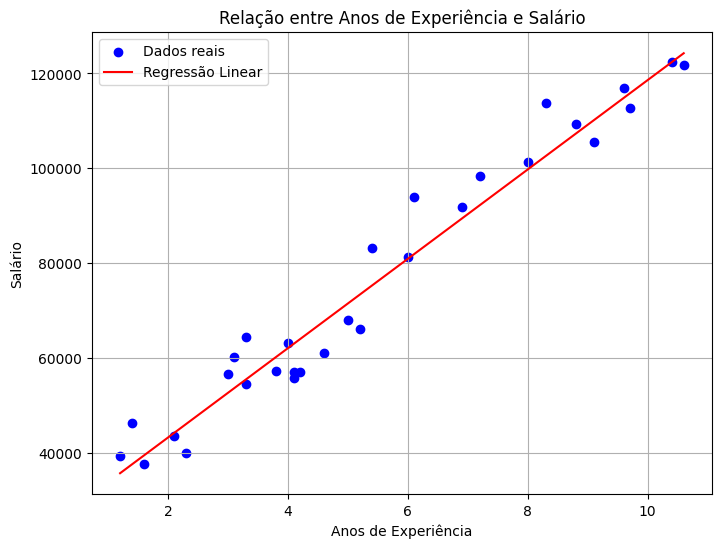

(49830096.855908394, 0.9024461774180497)

In [36]:
# Impotação
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Estou removendo as colunas que não iremos usar
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# criando variação de x e y
X = df[["YearsExperience"]]
y = df["Salary"]

# Dividindo os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criando o modelo de teste  e treinando
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão em análise
y_pred = model.predict(X_test)

# Validação de modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Gráfico de Regressão
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Dados reais")
plt.plot(X, model.predict(X), color="red", label="Regressão Linear")
plt.title("Relação entre Anos de Experiência e Salário")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.legend()
plt.grid(True)
plt.show()

mse, r2


# Análise:

### Esse gráfico de Regressão Linear mostra 90% de variação de salário com base aos anos de experiência, com MSE=49.830.096 E R2=0.90, notamos que, quanto mais anos de experiência, maior tende a ser o salário, em tese o contexto faz sentido pois, a experiência que um colaborador de sucesso possui ao longo dos anos, vai ser relevante a um colaborador que está entrando na empresa em um curto tempo, pois uma análise de um colaborador que já vivenciou problemas, irá dar uma maturidade no contexto de intepretação e solução do problema que a empresa está passando, notei também que são poucas pessoas que se mantem na empresa por mais de 10 anos.